In [3]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from matplotlib import rcParams
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset
import rsatoolbox.rdm as rsr
import os
import seaborn as sns
import sklearn as sk
import math
import pandas as pd
import pickle
import copy
import nibabel as nib
import re

In [4]:
# change the working directory to be the timecourse data
#os.chdir('/mnt/Data1/linjdata1/vswmda/scan_data/rsa/full_GLM_mgs_0.05_50/')
os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_mgs_topN/')
#os.chdir('/gpfs/scratch/linjjiang/scan_data/rsa/full_GLM_atlas_roi/')

In [5]:
with open('crossnobis_dual_bootstrap_10000_exp1.pkg','rb') as f:
    df1 = pickle.load(f)   

In [6]:
with open('crossnobis_dual_bootstrap_10000_exp2.pkg','rb') as f:
    df2 = pickle.load(f)   

In [7]:
roi_all = df1['roi'].unique()
session_all = df1['session'].unique()
epoch_all = ['stimulus','delay']

In [8]:
# get data from experiment 1

In [9]:
data = []

# session = 0
# epoch = 'delay'
# roi = 'v1'

for roi in roi_all:
    for epoch in epoch_all:
        for session in session_all:
            print(roi,epoch,session)
            df = df1[(df1['roi']==roi) & (df1['session']==session) & (df1['epoch']==epoch)]
            results = df.iloc[0,0] 

            models = results.models
            models_name = [m.name for m in models]

            # Extract the test results
            pairwise_results = results.test_all()[0]
            test_against_zero = results.test_all()[1]
            test_against_noise_ceiling = results.test_all()[2]
            eval_mean = results.get_means()
            eval_sem = results.get_sem()
            noise_ceil = results.get_noise_ceil()

            # Store pairwise test results
            for i, model1 in enumerate(models_name):
                for j, model2 in enumerate(models_name):
                    data.append({
                        'model': f'{model1} vs {model2}',                
                        'session': session,
                        'epoch': epoch,
                        'roi': roi,
                        'comparison': 'pairwise',
                        'mean': [eval_mean[i],eval_mean[j]],
                        'mean_diff':eval_mean[i]-eval_mean[j],
                        'p_value': pairwise_results[i, j],
                        'sem': [eval_sem[i],eval_sem[j]],
            #            'noise_ceil': noise_ceil
                    })

            # Store test against zero results
            for i, model in enumerate(models_name):
                data.append({
                    'model': model,
                    'session': session,
                    'epoch': epoch,
                    'roi': roi,            
                    'comparison': 'against_zero',
                        'mean': eval_mean[i],
                    'p_value': test_against_zero[i],
                        'sem': eval_sem[i],
            #            'noise_ceil': noise_ceil
                })

            # Store test against noise ceiling results
            for i, model in enumerate(models_name):
                data.append({
                    'model': model,
                    'session': session,
                    'epoch': epoch,
                    'roi': roi,

                    'comparison': 'against_noise_ceiling',

                        'mean': eval_mean[i],
                    'p_value': test_against_noise_ceiling[i],
                        'sem': eval_sem[i],
            #            'noise_ceil': noise_ceil
                })

area4 stimulus 0
area4 stimulus 1


/gpfs/home/linjjiang/.local/lib/python3.11/site-packages/rsatoolbox/inference/result.py:222: RuntimeWarning: Mean of empty slice
  perf = np.nanmean(perf, axis=-1)


area4 delay 0
area4 delay 1
v1 stimulus 0
v1 stimulus 1
v1 delay 0
v1 delay 1
v2 stimulus 0
v2 stimulus 1
v2 delay 0
v2 delay 1
ips stimulus 0
ips stimulus 1
ips delay 0
ips delay 1
fef stimulus 0
fef stimulus 1
fef delay 0
fef delay 1
sfg stimulus 0
sfg stimulus 1
sfg delay 0
sfg delay 1
mfg stimulus 0
mfg stimulus 1
mfg delay 0
mfg delay 1
ifg stimulus 0
ifg stimulus 1
ifg delay 0
ifg delay 1
ips0 stimulus 0
ips0 stimulus 1
ips0 delay 0
ips0 delay 1
ips1 stimulus 0
ips1 stimulus 1
ips1 delay 0
ips1 delay 1
ips2 stimulus 0
ips2 stimulus 1
ips2 delay 0
ips2 delay 1
ips3 stimulus 0
ips3 stimulus 1
ips3 delay 0
ips3 delay 1
ips4 stimulus 0
ips4 stimulus 1
ips4 delay 0
ips4 delay 1
ips5 stimulus 0
ips5 stimulus 1
ips5 delay 0
ips5 delay 1
spl1 stimulus 0
spl1 stimulus 1
spl1 delay 0
spl1 delay 1


In [101]:
# Convert the list of dictionaries to a DataFrame
df_results = pd.DataFrame(data)

In [102]:
roi_labels = {'area4': 'M1', 'v1': 'V1', 'v2': 'V2', 
              
              'ips0': 'IPS0', 'ips1': 'IPS1', 'ips2': 'IPS2', 
              'ips3': 'IPS3', 'ips4': 'IPS4', 'ips5': 'IPS5', 'spl1': 'SPL1',
              
          'ips': 'IPS', 'fef': 'FEF', 'sfg': 'SFG', 
          'mfg': 'MFG', 'ifg': 'IFG'}
session_labels = {0:'Session 1', 1:'Session 2'}

In [103]:
df_results['roi'] = df_results['roi'].map(roi_labels)


In [92]:
# df_results['session'] = df_results['session'].map(session_labels)

# Fig. 1. Plot model accuracy against zero

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")
    
    plt.rcParams.update({'font.size': 26, 'axes.linewidth': 2})
        
    # Set up the matplotlib figure
    plt.figure(figsize=(2, 2)) 

    # Create a barplot
    bar_plot = sns.barplot(data=df, x='roi', y='mean', hue='session', errorbar=None, order=roi_order,
                           capsize=.2, palette=session_palette,legend=False) #"Blues"

    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

    # Plot error bars and significant markers
    for idx, (center, mean, sem, sig) in enumerate(zip(bar_centers, df['mean'], df['sem'], df['significant'])):
        # Error bars
        plt.errorbar(center, mean, yerr=sem, fmt='none', c='black', capsize=5, elinewidth=2)
        # Star for significance
        if sig:
            plt.text(center, mean + sem + 0.02, '*', ha='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.4])
    plt.ylabel('',fontsize=30) #RDM prediction accuracy
    plt.title('', y=1.05)
    plt.xticks(rotation=45)
    plt.yticks([0,0.2,0.4])
    sns.despine()  # Removes the top and right border
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()


In [56]:

def plot_model_acc_full(df_results,roi,session,epoch,comparison,model,multcomp,title):
    
    df = df_results[(df_results['roi'].isin(roi)) 
                    & (df_results['session'].isin(session)) 
                    & (df_results['epoch'].isin(epoch))
                    & (df_results['comparison'].isin(comparison))
                    & (df_results['model'].isin(model))]

    p_value = df['p_value'].tolist()
    #print(p_value)

    if multcomp == True:
        crit, significant = fdr_correction(p_value, alpha=0.05)
        #print(significant)
        df['significant'] = significant[0]
    else:
        df['significant'] = np.array(p_value) < 0.05

    df.reset_index(drop=True, inplace=True)  # Resetting the index

    #df = df[df['model']=='LR']

    # Convert the 'roi' column to a Categorical type based on the specified order
    df['roi'] = pd.Categorical(df['roi'], categories=roi, ordered=True)

    # Now sort the DataFrame by 'session' and 'roi'
    df = df.sort_values(by=['session', 'roi'])

    plot_model_acc(df,title,roi)
    
    

In [57]:
session_palette= ['#D3D3D3', '#A9A9A9']

    model  session     epoch roi    comparison     mean  mean_diff   p_value  \
616    LR        1  stimulus  V2  against_zero  0.07166        NaN  0.021404   

          sem  
616  0.024456  


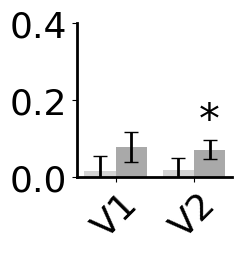

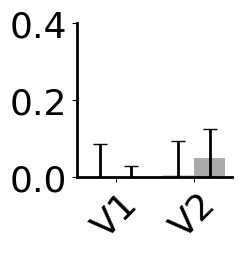

In [58]:
roi_order = ['V1', 'V2']
print(df_results[(df_results['comparison'].isin(['against_zero']))
            & (df_results['p_value']<=0.05)
          & (df_results['roi'].isin(roi_order))
                & (df_results['model'].isin(['LR']))])

#Spatiotemporal (L-R vs. R-L)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['LR'],False,'Fig4_bootstrap_visual_stim_LR.png')    
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['LR'],False,'Fig4_bootstrap_visual_delay_LR.png')   


    model  session     epoch roi    comparison      mean  mean_diff   p_value  \
302    WT        0  stimulus  V1  against_zero  0.178516        NaN  0.004071   
365    WT        1  stimulus  V1  against_zero  0.230689        NaN  0.003632   
554    WT        0  stimulus  V2  against_zero  0.165382        NaN  0.006333   
617    WT        1  stimulus  V2  against_zero  0.223397        NaN  0.001500   

          sem  
302  0.042069  
365  0.045739  
554  0.043555  
617  0.034715  


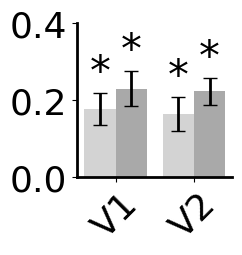

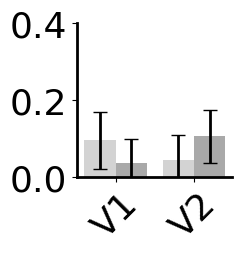

In [59]:
roi_order = ['V1', 'V2']
print(df_results[(df_results['comparison'].isin(['against_zero']))
            & (df_results['p_value']<=0.05)
          & (df_results['roi'].isin(roi_order))
                & (df_results['model'].isin(['WT']))])
#Spatial shape (wide vs. tall)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['WT'],False,'Fig4_bootstrap_visual_stim_WT.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['WT'],False,'Fig4_bootstrap_visual_delay_WT.png')   


    model  session     epoch roi    comparison      mean  mean_diff   p_value  \
303   Ecc        0  stimulus  V1  against_zero  0.204376        NaN  0.002473   
366   Ecc        1  stimulus  V1  against_zero  0.217463        NaN  0.003609   
555   Ecc        0  stimulus  V2  against_zero  0.233801        NaN  0.000496   
618   Ecc        1  stimulus  V2  against_zero  0.246806        NaN  0.003839   

          sem  
303  0.042707  
366  0.043039  
555  0.033975  
618  0.049709  


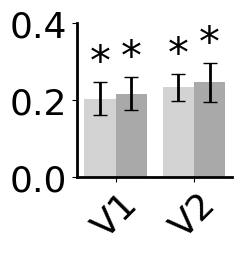

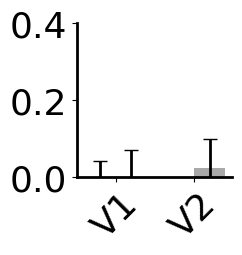

In [60]:
roi_order = ['V1', 'V2']
print(df_results[(df_results['comparison'].isin(['against_zero']))
            & (df_results['p_value']<=0.05)
          & (df_results['roi'].isin(roi_order))
                & (df_results['model'].isin(['Ecc']))])
#Visual eccentricity (3 vs. 5.5 dva
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['Ecc'],False,'Fig4_bootstrap_visual_stim_Ecc.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['Ecc'],False,'Fig4_bootstrap_visual_delay_Ecc.png')   


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")
    
    plt.rcParams.update({'font.size': 26, 'axes.linewidth': 3})
        
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 2)) 

    # Create a barplot
    bar_plot = sns.barplot(data=df, x='roi', y='mean', hue='session', errorbar=None, order=roi_order,
                           capsize=.2, palette=session_palette,legend=False) #"Blues"

    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

    # Plot error bars and significant markers
    for idx, (center, mean, sem, sig) in enumerate(zip(bar_centers, df['mean'], df['sem'], df['significant'])):
        # Error bars
        plt.errorbar(center, mean, yerr=sem, fmt='none', c='black', capsize=5, elinewidth=3)
        # Star for significance
        if sig:
            plt.text(center, mean + sem + 0.02, '*', ha='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.3])
    plt.ylabel('',fontsize=30) #RDM prediction accuracy
    plt.title('', y=1.05)
    plt.xticks(rotation=45)
    plt.yticks([0,0.3])
    sns.despine()  # Removes the top and right border
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()


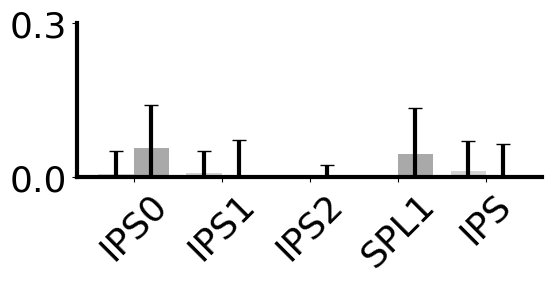

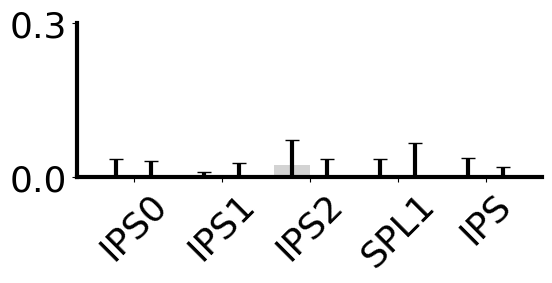

In [67]:
roi_order = ['IPS0', 'IPS1', 'IPS2', 'SPL1','IPS']
#Spatiotemporal (L-R vs. R-L)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['LR'],False,'Fig5_bootstrap_parietal_stim_LR.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['LR'],False,'Fig5_bootstrap_parietal_delay_LR.png')   


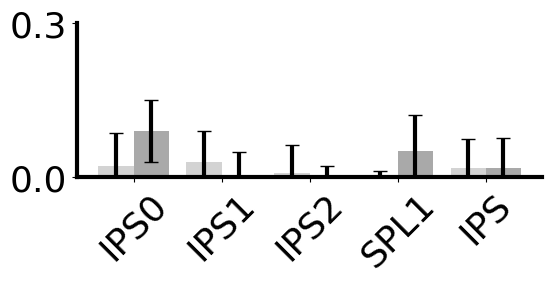

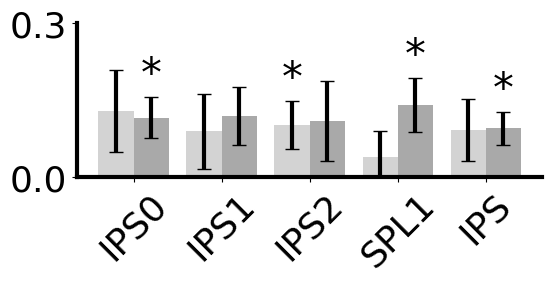

In [68]:
roi_order = ['IPS0', 'IPS1', 'IPS2', 'SPL1','IPS']
#Spatiotemporal (L-R vs. R-L)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['WT'],False,'Fig5_bootstrap_parietal_stim_WT.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['WT'],False,'Fig5_bootstrap_parietal_delay_WT.png')   


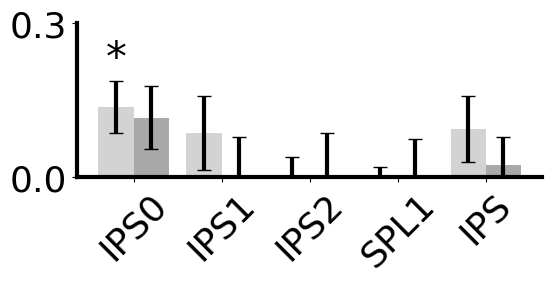

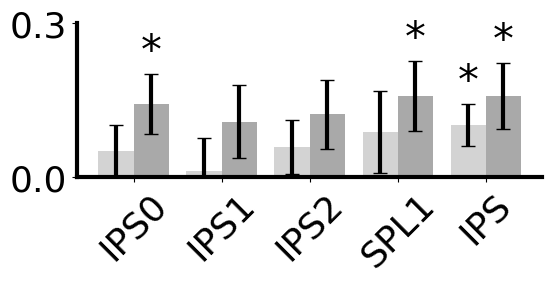

In [69]:
roi_order = ['IPS0', 'IPS1', 'IPS2', 'SPL1','IPS']
#Spatiotemporal (L-R vs. R-L)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['Ecc'],False,'Fig5_bootstrap_parietal_stim_Ecc.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['Ecc'],False,'Fig5_bootstrap_parietal_delay_Ecc.png')   


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")
    
    plt.rcParams.update({'font.size': 26, 'axes.linewidth': 3})
        
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 2)) 

    # Create a barplot
    bar_plot = sns.barplot(data=df, x='roi', y='mean', hue='session', errorbar=None, order=roi_order,
                           capsize=.2, palette=session_palette,legend=False) #"Blues"

    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

    # Plot error bars and significant markers
    for idx, (center, mean, sem, sig) in enumerate(zip(bar_centers, df['mean'], df['sem'], df['significant'])):
        # Error bars
        plt.errorbar(center, mean, yerr=sem, fmt='none', c='black', capsize=5, elinewidth=3)
        # Star for significance
        if sig:
            plt.text(center, mean + sem + 0.02, '*', ha='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.2])
    plt.ylabel('',fontsize=30) #RDM prediction accuracy
    plt.title('', y=1.05)
    plt.xticks(rotation=45)
    plt.yticks([0,0.2])
    sns.despine()  # Removes the top and right border
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()


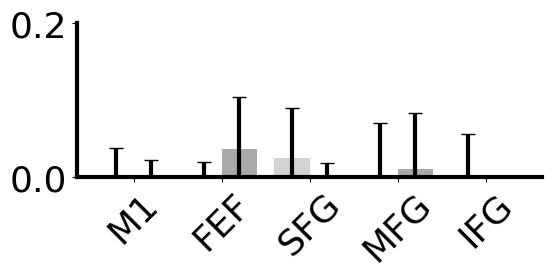

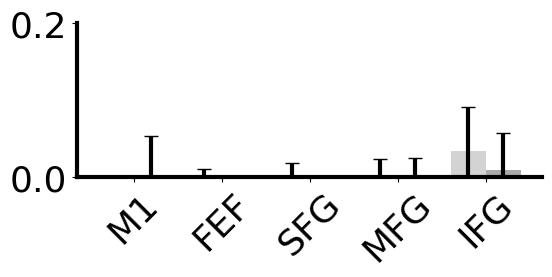

In [106]:
roi_order = ['M1','FEF', 'SFG', 'MFG', 'IFG']
#Spatiotemporal (L-R vs. R-L)
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['LR'],False,'Fig6_bootstrap_frontal_stim_LR.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['LR'],False,'Fig6_bootstrap_frontal_delay_LR.png')   


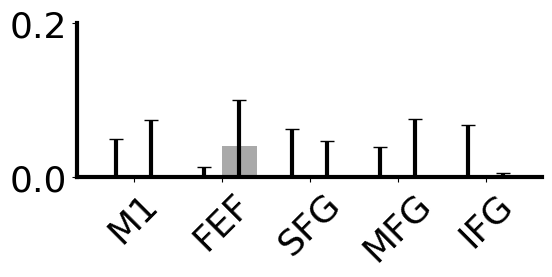

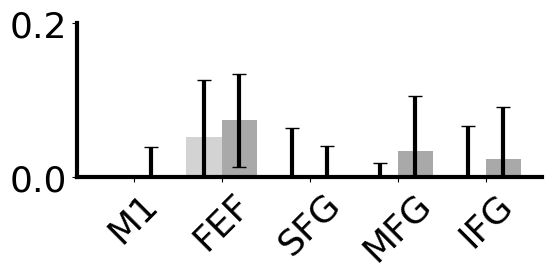

In [77]:
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['WT'],False,'Fig6_bootstrap_frontal_stim_WT.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['WT'],False,'Fig6_bootstrap_frontal_delay_WT.png') 

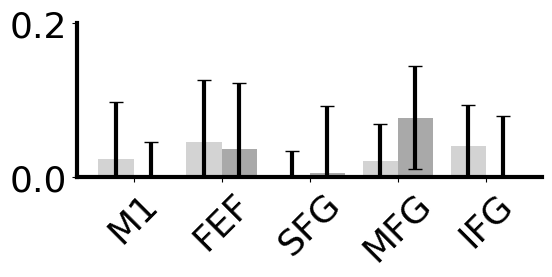

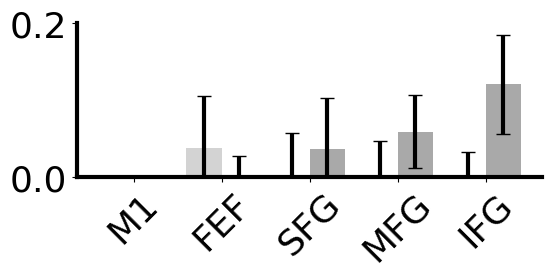

In [78]:
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['Ecc'],False,'Fig6_bootstrap_frontal_stim_Ecc.png')   
plot_model_acc_full(df_results,roi_order,[0,1],['delay'],
                    ['against_zero'],['Ecc'],False,'Fig6_bootstrap_frontal_delay_Ecc.png') 

### plot legend

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")
    
    plt.rcParams.update({'font.size': 26, 'axes.linewidth': 2})
        
    # Set up the matplotlib figure
    plt.figure(figsize=(2, 2)) 

    # Create a barplot
    bar_plot = sns.barplot(data=df, x='roi', y='mean', hue='session', errorbar=None, order=roi_order,
                           capsize=.2, palette=session_palette,legend=True) #"Blues"
    sns.move_legend(bar_plot, labels=['Sess1','Sess2'],loc='upper right', bbox_to_anchor=(3.5,2))
    
    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

    # Plot error bars and significant markers
    for idx, (center, mean, sem, sig) in enumerate(zip(bar_centers, df['mean'], df['sem'], df['significant'])):
        # Error bars
        plt.errorbar(center, mean, yerr=sem, fmt='none', c='black', capsize=5, elinewidth=2)
        # Star for significance
        if sig:
            plt.text(center, mean + sem + 0.02, '*', ha='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.4])
    plt.ylabel('',fontsize=30) #RDM prediction accuracy
    plt.title('', y=1.05)
    plt.xticks(rotation=45)
    plt.yticks([0,0.2,0.4])
    sns.despine()  # Removes the top and right border
   
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    
    # Show the plot
    plt.show()


    model  session     epoch roi    comparison      mean  mean_diff   p_value  \
303   Ecc        0  stimulus  V1  against_zero  0.204376        NaN  0.002473   
366   Ecc        1  stimulus  V1  against_zero  0.217463        NaN  0.003609   
555   Ecc        0  stimulus  V2  against_zero  0.233801        NaN  0.000496   
618   Ecc        1  stimulus  V2  against_zero  0.246806        NaN  0.003839   

          sem  
303  0.042707  
366  0.043039  
555  0.033975  
618  0.049709  


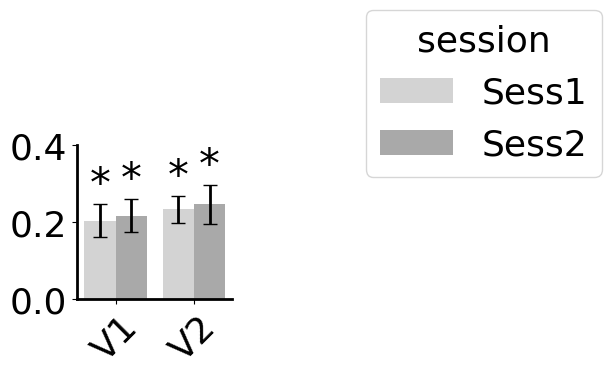

In [114]:
roi_order = ['V1', 'V2']
print(df_results[(df_results['comparison'].isin(['against_zero']))
            & (df_results['p_value']<=0.05)
          & (df_results['roi'].isin(roi_order))
                & (df_results['model'].isin(['Ecc']))])
#Visual eccentricity (3 vs. 5.5 dva
plot_model_acc_full(df_results,roi_order,[0,1],['stimulus'],
                    ['against_zero'],['Ecc'],False,'session_legend.png')   
 


# Compare model accuracy across task epochs

In [143]:
from rsatoolbox.util.inference_util import extract_variances
from scipy import stats
def calc_model_var(evaluations,n_rdm,n_pattern):
    eval_ok = (~np.isnan(evaluations[:, 0, 0, 0, 0]) & ~np.isnan(evaluations[:, 1, 0, 0, 0]))
    
    # we essentially project from the two points for 1 repetition and
    # for n_cv repetitions to infinitely many cv repetitions
    evals_nonan = np.mean(np.mean(evaluations[eval_ok], -2), -2)
    evals_1 = np.mean(evaluations[eval_ok], -3)
    
    #if use_correction and n_cv > 1:
    matrix = evals_nonan
    matrix -= np.mean(matrix, 0, keepdims=True)    
    var_mean = np.einsum('ijk,ilk->kjl', matrix, matrix) \
        / (matrix.shape[0] - 1)    
    
    matrix_1 = evals_1
    matrix_1 -= np.mean(matrix_1, 0, keepdims=True)
    var_1 = np.einsum('ijmk,ilmk->kjl', matrix_1, matrix_1) \
        / (matrix_1.shape[0] - 1) / matrix_1.shape[2]    
    
    # this is the main formula for the correction:
    variances = (n_cv * var_mean - var_1) / (n_cv - 1)    
    
    # calcualte model variance and differential variance
    nc_included = False
    model_var, diff_var, noise_ceil_var = \
        extract_variances(variances, nc_included, n_rdm, n_pattern)
    
    return model_var, diff_var, variances, eval_ok

In [144]:
from rsatoolbox.util.matrix import pairwise_contrast
from rsatoolbox.util.rdm_utils import batch_to_matrices

def pairwise(evaluations, variances, dof):
    n_model = evaluations.shape[1]
    evaluations = np.nanmean(evaluations, 0)
    while evaluations.ndim > 1:
        evaluations = np.nanmean(evaluations, axis=-1)
    C = pairwise_contrast(np.arange(n_model))
    diffs = C @ evaluations
    t = diffs / np.sqrt(np.maximum(variances, np.finfo(float).eps))
    t = batch_to_matrices(np.array([t]))[0][0]
    p = 2 * (1 - stats.t.cdf(np.abs(t), dof))
    
    return diffs, t, p, evaluations


In [145]:
def bootstrap_pairwise(results):
    models = results[0].models
    n_model = results[0].n_model
    method = results[0].method
    cv_method = results[0].cv_method
    n_cv = 2
    fitter= results[0].fitter
    n_bootstraps=results[0].n_bootstraps

    evaluations = []
    variances = []
    dof = []
    n_rdm  = []
    n_pattern = []
    noise_ceil = []

    for result in results: # session 0 and session 1
        evaluations.append(result.evaluations)
        variances.append(result.variances)
        dof.append(result.dof)
        n_rdm.append(result.n_rdm)
        n_pattern.append(result.n_pattern)
        noise_ceil.append(result.noise_ceiling)


    eval_new = []
    #noise_ceil_new = []
    for i in range(n_model):
        temp = np.concatenate((evaluations[0][:,i:i+1,:,:],evaluations[1][:,i:i+1,:,:]),axis=1)
        #temp1 = np.concatenate((noise_ceil[0][:,i:i+1,:,:],evaluations[1][:,i:i+1,:,:]),axis=1)
        eval_new.append(temp)
        #noise_ceil.append()

    each_variance = []
    diff_variance = []
    nonan_iter = []

    for eval in eval_new:
        model_var, diff_var,variances, eval_ok = calc_model_var(eval,min(n_rdm),min(n_pattern))
        each_variance.append(model_var)
        diff_variance.append(diff_var)
        nonan_iter.append(sum(eval_ok))

    eval_diff = []
    t_stat = []
    p_val = []
    evals = []
    
    for i in range(len(eval_new)):
        diffs, t, p, eval = pairwise(eval_new[i], diff_variance[i], min(dof))
        eval_diff.append(diffs)
        t_stat.append(t)
        p_val.append(p)
        evals.append(eval)

    return eval_diff,t_stat,p_val,evals


In [148]:
model_names = [m.name for m in df1.iloc[0,0].models]
print(model_names)


['LR', 'WT', 'Ecc', 'LR-WT', 'Ecc-LR', 'Ecc-WT', 'All']


In [150]:
all_tuples = (('V1', 'WT', 1),('V2', 'WT', 1), ('IPS0', 'WT', 1), ('SPL1', 'WT', 1),
              ('V1', 'Ecc', 1),('V2', 'Ecc', 1),('IPS0', 'Ecc', 1),('SPL1', 'Ecc', 1))

In [153]:
df1['roi'] = df1['roi'].map(roi_labels)

In [154]:
data = []
for one_tuple in all_tuples:
    roi = one_tuple[0]
    model = one_tuple[1]
    session = one_tuple[2]
    epochs = ['stimulus','delay']
    n_cv = 2
    
    results = []
    for epoch in epochs:
        df = df1[(df1['roi']==roi) & (df1['session']==session) & (df1['epoch']==epoch)]
        results.append(df.iloc[0,0])

    eval_diff,t_stat,p_val,evals = bootstrap_pairwise(results)

    idx = model_names.index(model)
    #df_epoch = pd eval_diff[idx][0],t_stat[idx][0,1],p_val[idx][0,1],evals[idx])
    data.append({
            'model': model,                
            'session': session,
            'roi': roi,
            'comparison': 'pairwise',
            'mean_stimulus': evals[idx][0],
            'mean_delay': evals[idx][1],
            'mean_diff':eval_diff[idx][0],
            't_stat': t_stat[idx][0,1],
            'p_value': p_val[idx][0,1],
        })


In [155]:
df_epoch = pd.DataFrame(data)


In [167]:

def plot_model_acc_full(df_results,df_epoch,roi,epoch,session,model,multcomp,title):
    
    df0 = df_results[(df_results['roi'].isin([roi])) 
                    & (df_results['session'].isin([session])) 
                    & (df_results['epoch'].isin(epoch))
                    & (df_results['comparison'].isin(['against_zero']))
                    & (df_results['model'].isin([model]))]

    # Convert the 'roi' column to a Categorical type based on the specified order
    df0['epoch'] = pd.Categorical(df0['epoch'], categories=epoch, ordered=True)

    # Now sort the DataFrame by 'session' and 'roi'
    df0 = df0.sort_values(by=['epoch'])

    #print(df0)

    df = df_epoch[(df_epoch['p_value'] <= 0.05) & (df_epoch['roi'] == roi) 
                  & (df_epoch['session'] == session)
                 & (df_epoch['model'] == model)]

    #print(df)

    if ~df.empty:
        df.reset_index(drop=True, inplace=True)  # Resetting the index

    plot_model_acc(df0,df,model,roi,session,epoch,title)
    
    

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df0,df,model,roi,session,epoch,title):
    
    # def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")

    # Set up the matplotlib figure
    plt.figure(figsize=(4, 5))

    # Set the overall font size for ticks
    plt.rcParams.update({'font.size': 26})

   # color = sns.color_palette("Blues",2)
    #color = [color[0],color[3]]
   # color = color[df0['session'].iloc[0]]
    color = session_palette[df0['session'].iloc[0]]
    
    # Create a barplot
    bar_plot = sns.barplot(data=df0, x='epoch', y='mean', hue='session',order=epoch,
                           capsize=.2, palette=[color], dodge=True, ci=None,legend=False)

    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    bar_heights = [bar.get_height() for bar in bars]

    # Plot error bars and significant markers
    i = 0
    for idx, row in df0.iterrows():
        # Error bars for each model part
        plt.errorbar(bar_centers[i], row['mean'], yerr=row['sem'], fmt='none', c='black', capsize=5, elinewidth=2)
        i += 1

    # Plot significant markers with varying heights
    offset_increment = 0.04  # Height increment for each pair

    if not df.empty:
        print(df)
        high_bar = max(bar_heights[0], bar_heights[1])
        base_offset = np.mean([df0['sem'].iloc[0], df0['sem'].iloc[1]])  # Avoiding index range error

        # Dynamic offset calculation
        line_y = high_bar + base_offset + 0.04 #+ offset_increment
        star_y = line_y + 0.01

        # Draw horizontal line between bars
        plt.hlines(line_y, bar_centers[0], bar_centers[1], color='black', lw=2)

        # Draw star above the line
        plt.text((bar_centers[0] + bar_centers[1]) / 2, star_y, '*', ha='center', va='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.4])
    plt.ylabel('RDM prediction accuracy',fontsize=30) #RDM prediction accuracy
    plt.title(roi, y=1.05)
    sns.despine()  # Removes the top and right border
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    
    # Show the plot
    plt.show()


  model  session roi comparison  mean_stimulus  mean_delay  mean_diff  \
0    WT        1  V1   pairwise       0.230689    0.038062   0.192628   

     t_stat   p_value  
0  3.935278  0.017027  


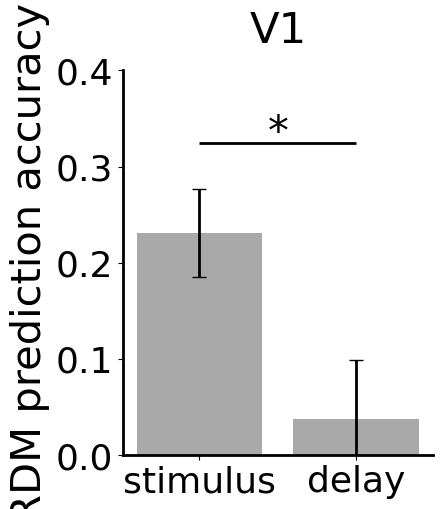

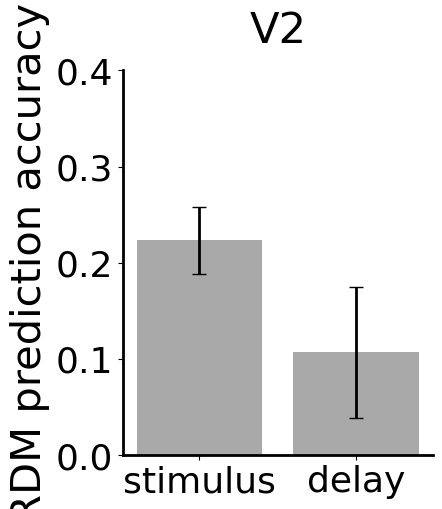

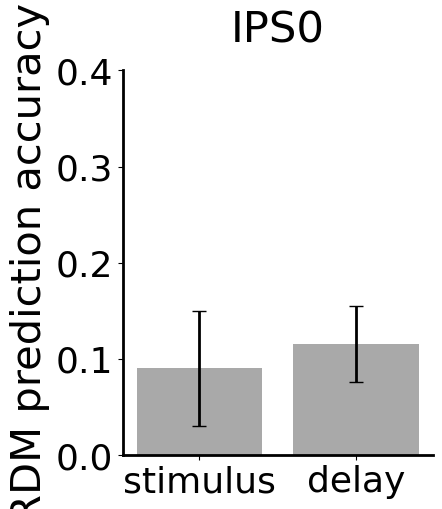

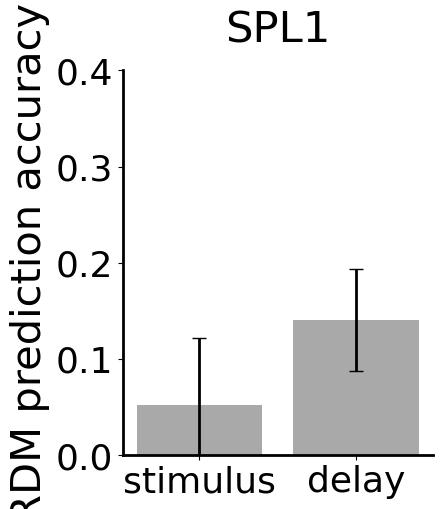

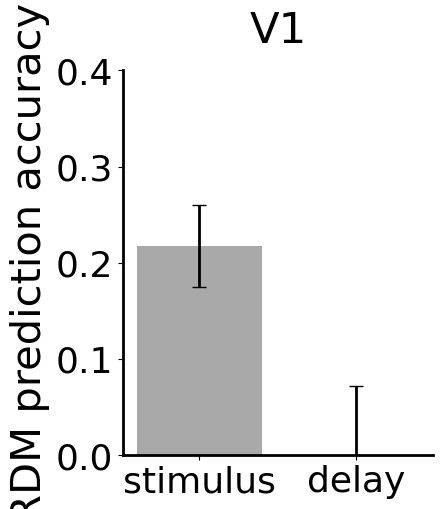

  model  session roi comparison  mean_stimulus  mean_delay  mean_diff  \
0   Ecc        1  V2   pairwise       0.246806    0.025533   0.221273   

     t_stat  p_value  
0  2.788844  0.04937  


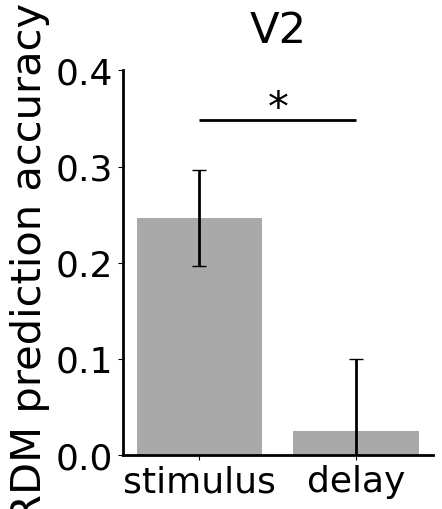

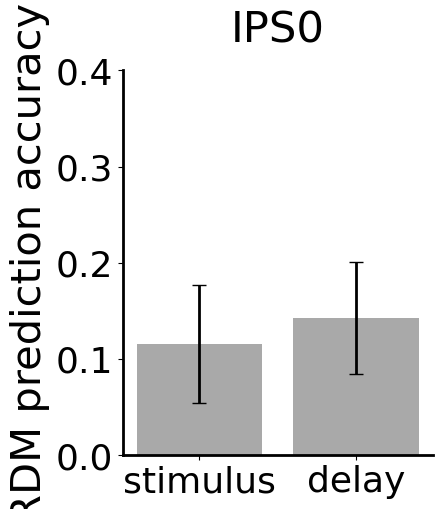

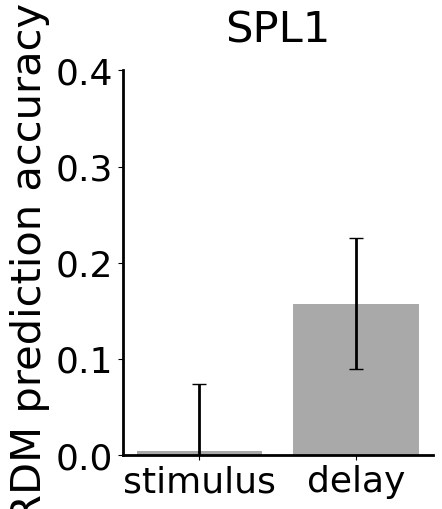

In [173]:
epoch = ['stimulus','delay']
for one_tuple in all_tuples:
#     one_tuple = all_tuples[0]
    roi = one_tuple[0]
    model = one_tuple[1]
    session = one_tuple[2]

    #print(roi)
    plot_model_acc_full(df_results,df_epoch,roi,epoch,session,model,
                        False,'Fig7_epoch_'+roi+'_'+model+'_sess'+str(session)+'.png')
    

# across models

In [182]:

def plot_model_acc_full(df_results,roi,session,epoch,model,model1,multcomp,title):
    
    df0 = df_results[(df_results['roi'].isin(roi)) 
                    & (df_results['session'].isin(session)) 
                    & (df_results['epoch'].isin(epoch))
                    & (df_results['comparison'].isin(['against_zero']))
                    & (df_results['model'].isin(model))]

    df = df_results[(df_results['roi'].isin(roi)) 
                    & (df_results['session'].isin(session)) 
                    & (df_results['epoch'].isin(epoch))
                    & (df_results['comparison'].isin(['pairwise']))
                    & (df_results['model'].isin(model1))]

    p_value = df['p_value'].tolist()

    if multcomp == True:
        crit, significant = fdr_correction(p_value, alpha=0.05)
        #print(significant)
        df['significant'] = significant[0]
    else:
        df['significant'] = np.array(p_value) < 0.05

    df.reset_index(drop=True, inplace=True)  # Resetting the index

    #df = df[df['model']=='LR']

    # Convert the 'roi' column to a Categorical type based on the specified order
    df['roi'] = pd.Categorical(df['roi'], categories=roi, ordered=True)

    # Now sort the DataFrame by 'session' and 'roi'
    df = df.sort_values(by=['session', 'roi'])

    plot_model_acc(df0,df,model,roi,session,epoch,title)
    
    return df['significant']
    

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

def plot_model_acc(df0,df,model,roi,session,epoch,title):
    
    # def plot_model_acc(df,title,roi_order):
    warnings.filterwarnings("ignore")

    # Set up the matplotlib figure
    plt.figure(figsize=(6, 4))

    # Set the overall font size for ticks
    plt.rcParams.update({'font.size': 26})

    color = session_palette #sns.color_palette("Blues",2)
    #color = [color[0],color[3]]
    color = color[df['session'].iloc[0]]

    # Create a barplot
    bar_plot = sns.barplot(data=df0, x='model', y='mean', hue='session',order=model,
                           capsize=.2, palette=[color], dodge=True, ci=None,legend=False)

    # Collecting bar centers for correct error bar and star placement
    bars = bar_plot.patches
    bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    bar_heights = [bar.get_height() for bar in bars]

    # Plot error bars and significant markers
    i = 0
    for idx, row in df0.iterrows():
        # Error bars for each model part
        plt.errorbar(bar_centers[i], row['mean'], yerr=row['sem'], fmt='none', c='black', capsize=5, elinewidth=2)
        i += 1

    # Plot significant markers with varying heights
    significant_models = df[df['significant']]['model'].tolist()
    model_tuples = tuple(tuple(model.split(' vs ')) for model in significant_models)
    offset_increment = 0.02  # Height increment for each pair
    print(significant_models)
    
    line_ys = [0]
    if model_tuples:
        for index, model_tuple in enumerate(model_tuples):
            idx0 = model.index(model_tuple[0])
            idx1 = model.index(model_tuple[1])
            #print(idx0,idx1)

            high_bar = max(bar_heights[idx0], bar_heights[idx1])
            base_offset = np.mean([df0['sem'].iloc[idx0], df0['sem'].iloc[idx1]])  # Avoiding index range error

            # Dynamic offset calculation
            line_y = max(max(line_ys), high_bar + base_offset) + (index+1) * offset_increment
            star_y = line_y + 0.005
            line_ys.append(line_y)

            # Draw horizontal line between bars
            plt.hlines(line_y, bar_centers[idx0], bar_centers[idx1], color='black', lw=2)

            # Draw star above the line
            plt.text((bar_centers[idx0] + bar_centers[idx1]) / 2, star_y, '*', ha='center', va='center', color='black', fontsize=30)

    # Adjust legend and labels
    #plt.legend(title='Session')
    plt.xlabel('',fontsize=30)
    plt.ylim([0,0.5])
    plt.ylabel('',fontsize=30) #RDM prediction accuracy
    plt.xticks(rotation=45)
    
    plt.title(roi[0]+ ', '+epoch[0], y=1.05, fontsize=30) # + ', session '+str(session[0]+1) 
    sns.despine()  # Removes the top and right border
    
    plt.savefig(title, bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()


In [184]:
all_comb = (('V1',1,'stimulus',['LR','WT','Ecc','LR-WT','Ecc-LR','Ecc-WT'],
             ['WT vs Ecc-WT','WT vs Ecc','Ecc vs Ecc-WT',
              'LR vs LR-WT','LR vs WT','WT vs LR-WT',
              'LR vs Ecc-LR','LR vs Ecc','Ecc vs Ecc-LR']),
('V2',1,'stimulus',['LR','WT','Ecc','LR-WT','Ecc-LR','Ecc-WT'],
             ['WT vs Ecc-WT','WT vs Ecc','Ecc vs Ecc-WT',
              'LR vs LR-WT','LR vs WT','WT vs LR-WT',
              'LR vs Ecc-LR','LR vs Ecc','Ecc vs Ecc-LR']),               
('IPS0',1,'delay',['LR','WT','Ecc','LR-WT','Ecc-LR','Ecc-WT'],
             ['WT vs Ecc-WT','WT vs Ecc','Ecc vs Ecc-WT',
              'LR vs LR-WT','LR vs WT','WT vs LR-WT',
              'LR vs Ecc-LR','LR vs Ecc','Ecc vs Ecc-LR']),              
('SPL1',1,'delay',['LR','WT','Ecc','LR-WT','Ecc-LR','Ecc-WT'],
             ['WT vs Ecc-WT','WT vs Ecc','Ecc vs Ecc-WT',
              'LR vs LR-WT','LR vs WT','WT vs LR-WT',
              'LR vs Ecc-LR','LR vs Ecc','Ecc vs Ecc-LR']))


['LR vs WT', 'LR vs LR-WT', 'LR vs Ecc-LR']


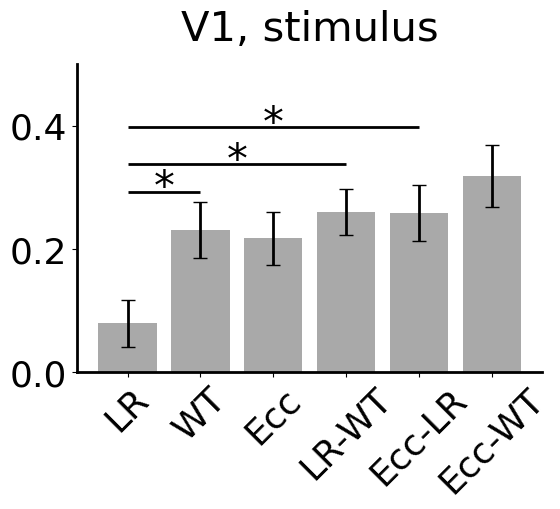

['LR vs WT', 'LR vs Ecc', 'LR vs LR-WT', 'LR vs Ecc-LR']


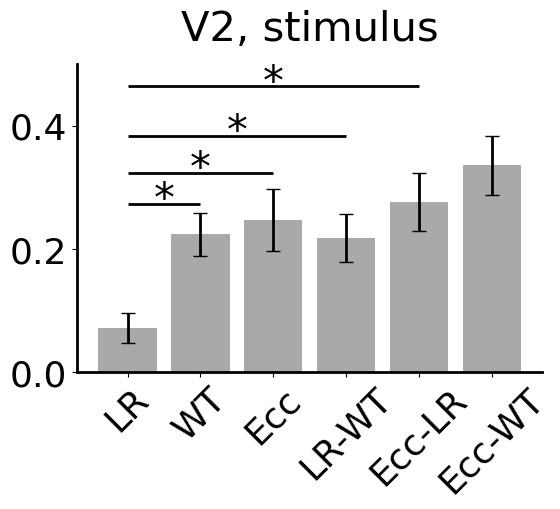

[]


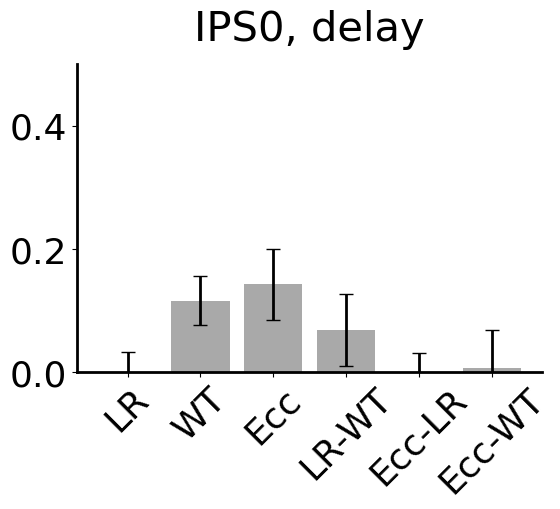

[]


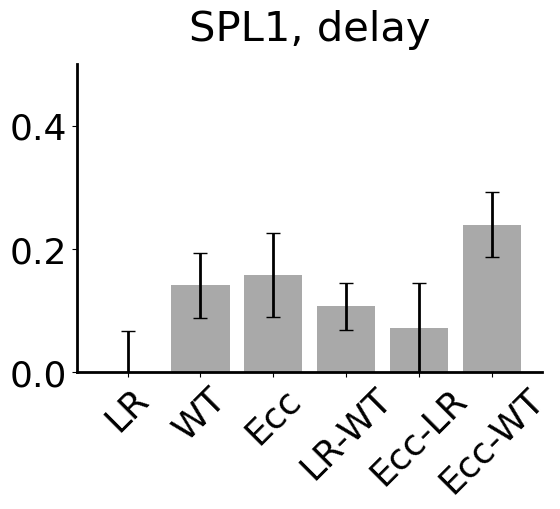

In [185]:
for comb in all_comb:
    roi,session,epoch = comb[0],comb[1],comb[2]
    
    plot_model_acc_full(df_results,[roi],[session],[epoch],
                        comb[3],comb[4],False,'Fig8_model_'+roi+'_'+epoch+'_sess'+str(session)+'.png')